In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate 
%matplotlib notebook

In [6]:
df = pd.read_csv('PEEBlue.csv')
df

,V applied,V meter avg,V applied reverse,V meter avg reverse (mV)
0,0.498,0.565,-0.001,296.2
1,0.885,0.773,-0.303,167.1
2,1.103,0.894,-0.600,65.1
3,1.457,1.080,-0.908,15.4
4,1.995,1.363,-1.058,5.8
5,2.533,1.641,-1.193,1.8
6,3.068,1.888,-1.320,0.5
7,3.157,2.075,-1.355,0.1
8,4.064,2.303,-1.392,-0.1
9,5.010,2.649,-1.492,-0.6


<IPython.core.display.Javascript object>


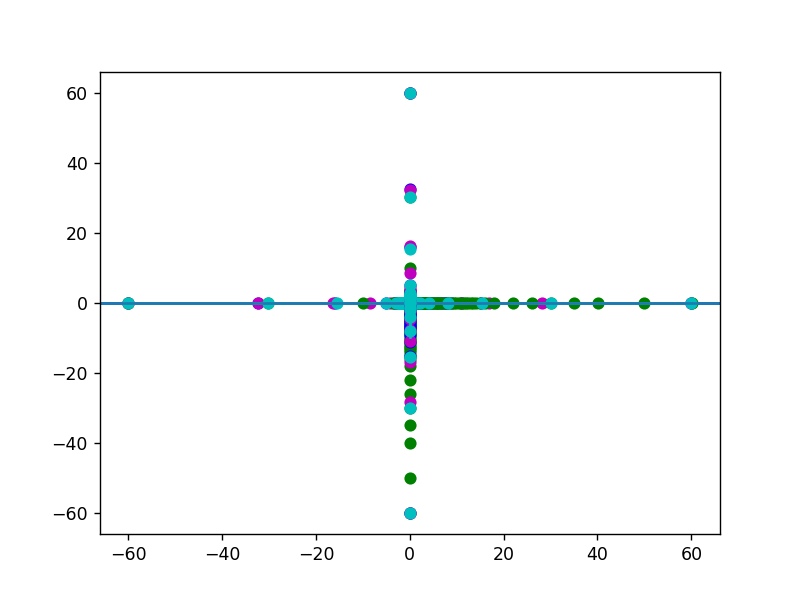

In [7]:

df = pd.read_csv('PEEBlue.csv')

#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfBlue = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

fBlue = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - fBlue(df2['applied'].values)
corryBlue = correctedy
 
# seems to only work for linear interpolation and no higher orders. unsure as to why.
interpBlue = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 1)
 
#plt.plot(df2['applied'].values, df2['meter'].values, 'go')
plt.plot(df2['applied'].values, correctedy, 'bo')
plt.plot(linex, interpBlue(linex))
plt.plot(linex,fBlue(linex),'-k')
plt.axhline()


In [70]:
interp

In [8]:
df = pd.read_csv('PEEViolate.csv')



#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfViolate = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corryviolate = correctedy
#plt.plot(df2['applied'].values, df2['meter'].values, 'ro')

interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 2)

corryviolate = corryviolate * interpBlue(20)/interp(20)

plt.plot(df2['applied'].values, corryviolate, 'mo')

plt.plot(linex,f(linex),'-k')
plt.plot(linex, interp(linex))

plt.axhline()


In [9]:
df = pd.read_csv('PEEGreen.csv')



#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfGreen = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corrygreen = correctedy
#plt.plot(df2['applied'].values, df2['meter'].values, 'ro')
interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 2)

corrygreen = corrygreen * interpBlue(20)/interp(20)


plt.plot(df2['applied'].values, corrygreen, 'go')

plt.plot(linex,f(linex),'-k')
plt.plot(linex, interp(linex))

plt.axhline()


In [10]:
df = pd.read_csv('PEEUV.csv')

#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfUV = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corryUV = correctedy
# seems to only work for linear interpolation and no higher orders. unsure as to why.
interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 1)

corryUV = corryUV * interpBlue(20)/interp(20)

#plt.plot(df2['applied'].values, df2['meter'].values, 'go')
plt.plot(df2['applied'].values, corryUV, 'co')
plt.plot(linex, interp(linex))
plt.plot(linex,f(linex),'-c')
plt.axhline()


In [34]:
df2['applied'].values[13:30]


array([-0.68 , -0.462, -0.256,  0.   ,  0.236,  0.402,  0.6  ,  0.84 ,
        1.069,  1.252,  1.422,  1.628,  1.834,  2.007,  2.211,  2.452,
        2.612])

<IPython.core.display.Javascript object>


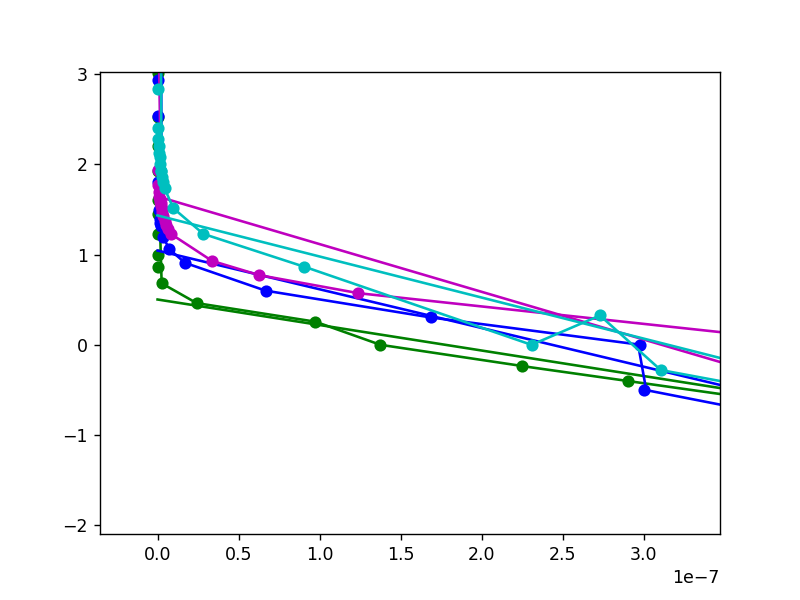

2.1983837996146145e-07 3.149633250699466e-07
2.1983837996146145e-07 3.149633250699466e-07
2.1983837996146145e-07 3.149633250699466e-07
2.1983837996146145e-07 3.149633250699466e-07


In [57]:

x = dfGreen['applied'].values[13:30]

y = corrygreen[13:30]


mGreen, bGreen = np.polyfit(x,y,deg=1)
interpGreen = scipy.interpolate.interp1d(corrygreen, -dfGreen['applied'].values, 1)

fGreen = lambda x: -1/mGreen*x + bGreen/mGreen
linex = np.linspace(corrygreen.min(),corrygreen.max(),1000)
plt.plot( corrygreen, -dfGreen['applied'].values, 'go')

plt.plot(linex,fGreen(linex),'-g')
plt.plot(linex, interpGreen(linex),'g-')
print(m, b)

#######################################


x = dfBlue['applied'].values[13:30]

y = corryBlue[13:30]


mBlue, bBlue = np.polyfit(x,y,deg=1)
interpBlue = scipy.interpolate.interp1d(corryBlue, -dfBlue['applied'].values, 1)


fBlue = lambda x: -1/mBlue*x + bBlue/mBlue
linex = np.linspace(corryBlue.min(),corryBlue.max(),1000)
plt.plot( corryBlue, -dfBlue['applied'].values, 'bo')

plt.plot(linex,fBlue(linex),'-b')
plt.plot(linex, interpBlue(linex),'b-')
print(m, b)

########################################

x = dfViolate['applied'].values[14:30]

y = corryviolate[14:30]


mViolate, bViolate = np.polyfit(x,y,deg=1)
interpViolate = scipy.interpolate.interp1d(corryviolate, -dfViolate['applied'].values, 1)


fViolate = lambda x: -1/mViolate*x + bViolate/mViolate
linex = np.linspace(corryviolate.min(), corryviolate.max(),1000)
plt.plot( corryviolate, -dfViolate['applied'].values, 'mo')

plt.plot(linex,fViolate(linex),'-m')
plt.plot(linex, interpViolate(linex),'m-')
print(m, b)

###########################################

x = dfUV['applied'].values[15:25]

y = corryUV[15:25]


mUV, bUV = np.polyfit(x,y,deg=1)
interpUV = scipy.interpolate.interp1d(corryUV, -dfUV['applied'].values, 1)

fUV = lambda x: -1/mUV*x + bUV/mUV
linex = np.linspace(corryUV.min(),corryUV.max(),1000)
plt.plot( corryUV, -dfUV['applied'].values, 'co')

plt.plot(linex,fUV(linex),'-c')
plt.plot(linex, interpUV(linex),'c-')
print(m, b)


<IPython.core.display.Javascript object>


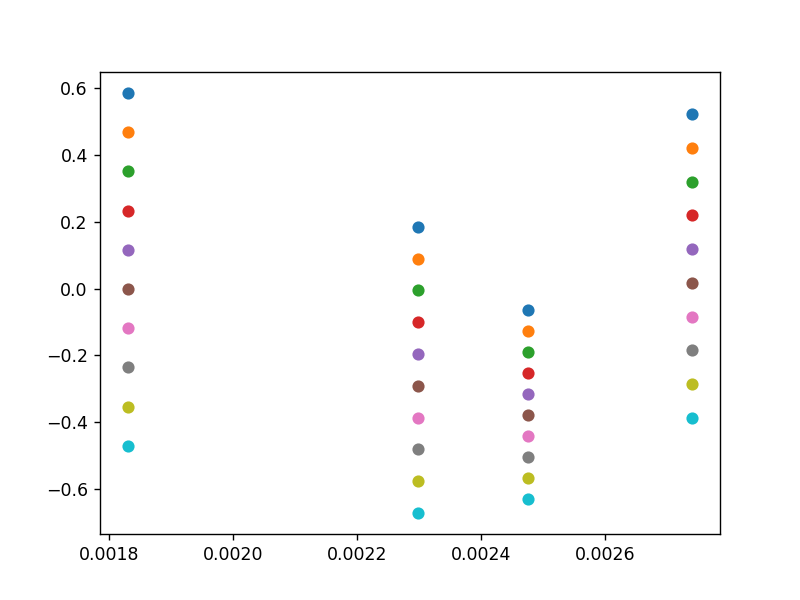

In [68]:

blue = []
green = []
violate = []
UV = []

Ix = np.linspace(2*10**-7, 4*10**-7, 10)

for i in Ix:
    blue.append(fBlue(i))
    green.append(fGreen(i))
    violate.append(fViolate(i))
    UV.append(fUV(i))

df3 = pd.DataFrame([blue, violate, green, UV], index=('blue', 'green', 'violate', 'UV'))
nu = [1/435, 1/546, 1/404, 1/365]

plt.plot(nu, df3.values, 'o')


<IPython.core.display.Javascript object>


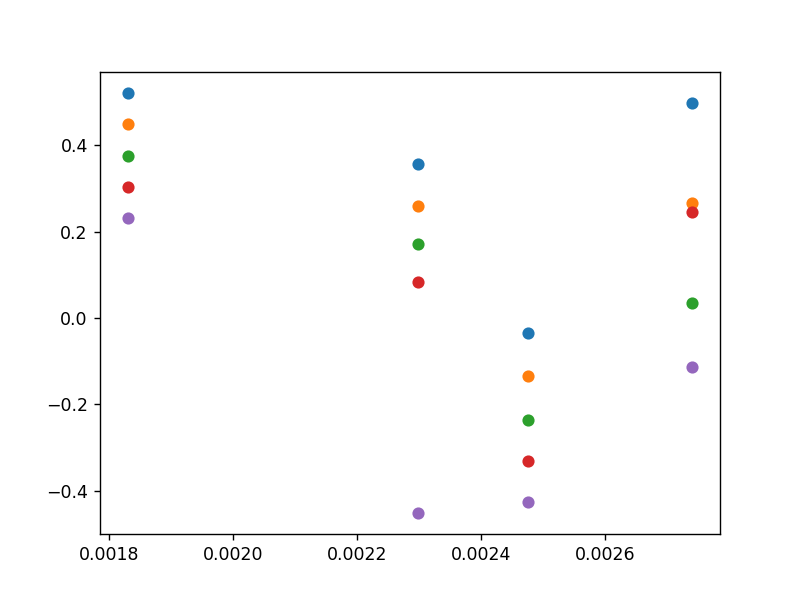

In [67]:
blue = []
green = []
violate = []
UV = []

Ix = np.linspace(1.5*10**-7, 3*10**-7, 5)

for i in Ix:
    blue.append(interpBlue(i))
    green.append(interpGreen(i))
    violate.append(interpViolate(i))
    UV.append(interpUV(i))

df3 = pd.DataFrame([blue, violate, green, UV], index=('blue', 'green', 'violate', 'UV'))
nu = [1/435, 1/546, 1/404, 1/365]

plt.plot(nu, df3.values, 'o')